## Lab 04: State of the Union Addresses (1/2)

In this lab we will begin working the transcripts of the State of the Union addresses. These speeches are a grand tradition with historical significance in the United States. In this first lab, we will do some simple analysis to parse the addresses by breaking them up into sentences. We will then look at the trends in the data, and do a little detective work to understand how the addresses have evolved over the years. 

In terms of technical and programming content, this lab will continue some of the skills we began developing in previous labs, including regular expressions, string splitting, and so on. We will also briefly discuss the `json` data format, which is very commonly used for unstructured data like text. We'll also take a closer look at the supremely handy `print` function.

Disclaimer: The addresses themselves are of course political events, and trigger political commentary. We'll focus on programming and the analysis of data rather than politics.

<br>



In [ ]:
from datascience import *
import numpy as np
import re

# direct plots to appear within the cell, and set their style
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')


A `json`, which stands for [Javascript Object Notation](https://en.wikipedia.org/wiki/JSON), is format that is essentially a dictionary of key-value pairs, but it allows nesting. Here is an excerpt from the SOTU data we'll be using.

```
{
   "date": "2017-02-28",
   "president": "Donald J. Trump",
   "title": "Address Before a Joint Session of the Congress",
   "url": "http://www.presidency.ucsb.edu/ws/index.php?pid=123408",
   "transcript": "Thank you very much. Mr. Speaker, Mr. Vice President, Members of Congress, the First Lady of the United States, and citizens of America: Tonight, as we mark the conclusion of our celebration of Black History Month, we are reminded of our Nation's path towards civil rights and the work that still remains to be done. Recent threats targeting Jewish community centers and vandalism of Jewish cemeteries, as well as last week's shooting in Kansas City, remind us that while we may be a nation divided on policies, we are a country that stands united in condemning hate and evil in all of its very ugly forms. Each American generation passes the torch of truth, liberty, and justice in an unbroken chain, all the way down to the present. That torch is now in our hands, and we will use it to light up the world. I am here tonight to deliver a message of unity and strength, and it is a message deeply delivered from my heart.
```

Let's read this in with the `json` package and load the meta-data and transcript for each speech into a `Table`

In [ ]:
import json
with open('transcripts.json') as f:
    data = json.load(f)

In [ ]:
import datetime

dates = []
presidents = []
transcripts = []
years = []

for a in np.arange(len(data)):
    dates.append(data[a]['date'])
    presidents.append(data[a]['president'])
    transcripts.append(data[a]['transcript'])
    year = datetime.datetime.strptime(data[a]['date'], "%Y-%m-%d").year
    years.append(year)

speeches = Table().with_columns('Date', dates, 'Year', years, 'President', presidents, 'Transcript', transcripts)
speeches = speeches.sort('Date', descending=True)
speeches.show(16)

Let's print out the first 500 characters of several speeches, just get an idea of what the data look like.
We'll use the `print` statement which takes the form `print(format % tuple)` where `format` is a string that specifies the format of `n` entries to be printed, and `tuple` is an `n` tuple of values. Some basic types are `%s` for string, `%d` for integer, and `%f` for float.  The statement `print('%s, %s!' % ('hello', 'world'))` will print `hello, world!`


In [ ]:
for s in np.arange(0, speeches.num_rows, 4):
    print("%s: %s \n\n%s...\n" % \
          (speeches.column('Date')[s], speeches.column('President')[s], speeches.column('Transcript')[s][0:500]))


In [ ]:
import datetime

def parse_into_sentences(transcript):
    import re
    transcript = transcript.replace("Mr.", "Mr").replace("Mrs.", "Mrs").replace("Ms.","Ms")
    pattern = re.compile(r'([A-Z][^\.!?]*[\.!?])')
    sentences = pattern.findall(transcript)
    return(sentences)

def longest_sentence(sentences):
    import numpy as np
    lengths = [len(re.split(r'\s', sentences[s])) for s in range(len(sentences))]
    s = np.argmax(lengths)
    return(sentences[s])

def show_longest(s):
    print("%s: %s\n" % (speeches.column('President')[s], speeches.column('Date')[s]))
    sents = parse_into_sentences(speeches.column('Transcript')[20])
    longest = longest_sentence(sents)
    print(longest)

In [ ]:
lengths = []
years = []
longest = []

for s in np.arange(speeches.num_rows):
    sentences = parse_into_sentences(speeches.column('Transcript')[s])
    long_sent = longest_sentence(sentences)
    lengths.append(len(sentences))
    longest.append(len(re.split(r'\s', long_sent)))
    
sotu = speeches.with_columns('Length', lengths, 'Longest', longest)
sotu.show(25)

In [ ]:
sotu = sotu.sort('Year', descending=False)
sotu

In [ ]:
sotu.bar('Year', 'Length')

Let's get the plot to look a little nicer.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# bar plot
fig = plt.figure()
fig.set_size_inches(11,4)
plt.bar(sotu.column('Year'), sotu.column('Length'), align='center', alpha=0.5, color='salmon')
plt.xlabel('year')
plt.ylabel('number of sentences')
plt.title('Number of sentences in SOTU address')
plt.show()

#line plot
fig = plt.figure()
fig.set_size_inches(11,4)
plt.plot(sotu.column('Year'), sotu.column('Length'), alpha=0.5, color='darkblue', linewidth=2)
plt.xlabel('year')
plt.ylabel('number of sentences')
plt.title('Number of sentences in SOTU address')
plt.show()


In [ ]:
fig = plt.figure()
fig.set_size_inches(11,4)
plt.bar(sotu.column('Year'), sotu.column('Longest'), align='center', alpha=0.5, color='salmon')
plt.xlabel('year')
plt.ylabel('number of words')
plt.title('Longest sentence (in words)')
plt.show()

## What's going on?

The trends in the lengths of the SOTUs are a little strange. Can we figure out what's going on? Let's do some detective work. 

You can check out this [SOTU history page from the House of Representatives](https://history.house.gov/Institution/SOTU/State-of-the-Union/) to get some information. For instance, we find these fun facts:

### Technological Change
* First radio broadcast of Message: President Calvin Coolidge, 1923.
* First television broadcast of Message: President Harry Truman, 1947.
* First televised evening delivery of Message: President Lyndon Johnson, 1965.
* First live webcast on Internet: President George W. Bush, 2002.
* First high definition television broadcast of Message, President George W. Bush, 2004.


### Record Holders
* The longest: President James Earl (Jimmy) Carter 33,667 words in 1981 (written). President William J. (Bill) Clinton 9,190 words in 1995 (spoken).
* The shortest: President George Washington, 1790, 1,089 words.
* Average length: 19th century was about 10,000 words; late 20th century, about 5,000 words.
* Most Messages/Addresses given: President Franklin Roosevelt, 12 (10 were personal appearances before Congress).
* Fewest Messages/Addresses given: President Zachary Taylor; President William Henry Harrison; President James A. Garfield.


See if you can explain the trends in the plot of the lengths of the SOTU address by year, based on these web pages that describe the SOTU history.

## War and Peace

*Your turn!*  Your task is to now take this code, and write a function `def mentions_of_word(word)` which does the following:

* Goes through each transcript, finding all matches of the word `word`.
* Assigns an array `count` with these `word` counts.
* Forms a table with a command `speeches.with_column('Count', count)`
* Generates a plot of the count of `word` by year, using a command as used above, like this:

```
    fig = plt.figure()
    fig.set_size_inches(11,4)
    plt.bar(sotu.column('Year'), sotu.column('Count'), align='center', alpha=0.5, color='salmon')
    plt.xlabel('year')
    plt.ylabel('count')
    plt.title('Mentions of "%s"' % word)
    plt.show()
```

After all of this is working, generate several groups of plots of what you imagine to be related words, and comment on the trends that you see in the data. For example, you could run

```
    for word in ['war', 'peace', 'arms']:
        mentions_of_word(word)
```
followed by some commentary on the plots in a markdown cell.

* Finally, change the function to take several words as input, and plot the counts of all of them together. Specifically, write a function `def mentions_of_words(words)` that calls that function `plt.plot` for each column of a table that has word counts for each word in the list (or set) `words`. An example plotting function is shown below.


**Have fun!**

<br>


## Appendix

Here is a little example of plotting a bunch of curves together. (Other examples can be found in the [YData](http://ydata123.org/sp19) materials, for example in the book section on [overlaid graphs](https://www.inferentialthinking.com/chapters/07/3/Overlaid_Graphs).)

theta,sin(x),cos(x),sin(2x),cos(2x)
-4,0.756802,-0.653644,-0.494679,-0.07275
-3.9,0.687766,-0.725932,-0.499272,0.0269777
-3.8,0.611858,-0.790968,-0.48396,0.12563
-3.7,0.529836,-0.8481,-0.449354,0.219274
-3.6,0.44252,-0.896758,-0.396834,0.304176
-3.5,0.350783,-0.936457,-0.328493,0.376951
-3.4,0.255541,-0.966798,-0.247057,0.434699
-3.3,0.157746,-0.98748,-0.155771,0.475116
-3.2,0.0583741,-0.998295,-0.0582746,0.496592
-3.1,-0.0415807,-0.999135,0.0415447,0.498271


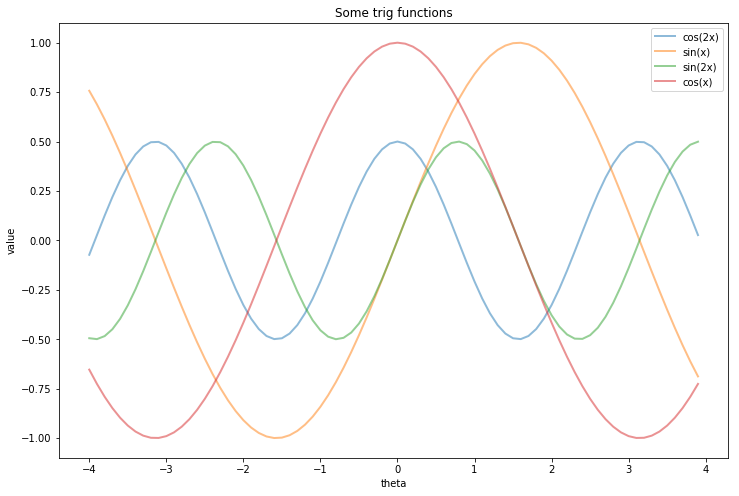

In [1]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

theta = np.arange(-4,4,.1)
cos = np.cos(theta)
sin = np.sin(theta)
cos2 = .5*np.cos(2*theta)
sin2 = .5*np.sin(2*theta)
table = Table().with_columns('theta', theta, 'sin(x)', sin, 'cos(x)', cos, 'sin(2x)', sin2, 'cos(2x)', cos2)
table.show(10)

fig = plt.figure()
fig.set_size_inches(12,8)
cols = {'sin(x)', 'cos(x)', 'sin(2x)', 'cos(2x)'}
for col in cols:
        plt.plot(table.column('theta'), table.column(col), alpha= 0.5, linewidth=2)
plt.xlabel('theta')
plt.ylabel('value')
plt.title('Some trig functions')
plt.legend(cols)
plt.show()